# TD1

## Exercice 1 – Perceptron Multicouche avec SciKitLearn (Rappel)

L’objectif de cet exercice est de vous rappeler comment implémenter des MLP en SciKitLearn.
Cette bibliothèque est souvent suffisante pour une telle architecture. Les exercice suivant
utiliseront Keras nécessaire au DeepLearning

In [1]:
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier

import tensorflow as tf

import numpy as np
from sklearn.preprocessing import StandardScaler


### 1 - Charger le dataset IRIS. Utilisez un pairplot (bibliothèque seaborn) pour visualiser et analyser les données.

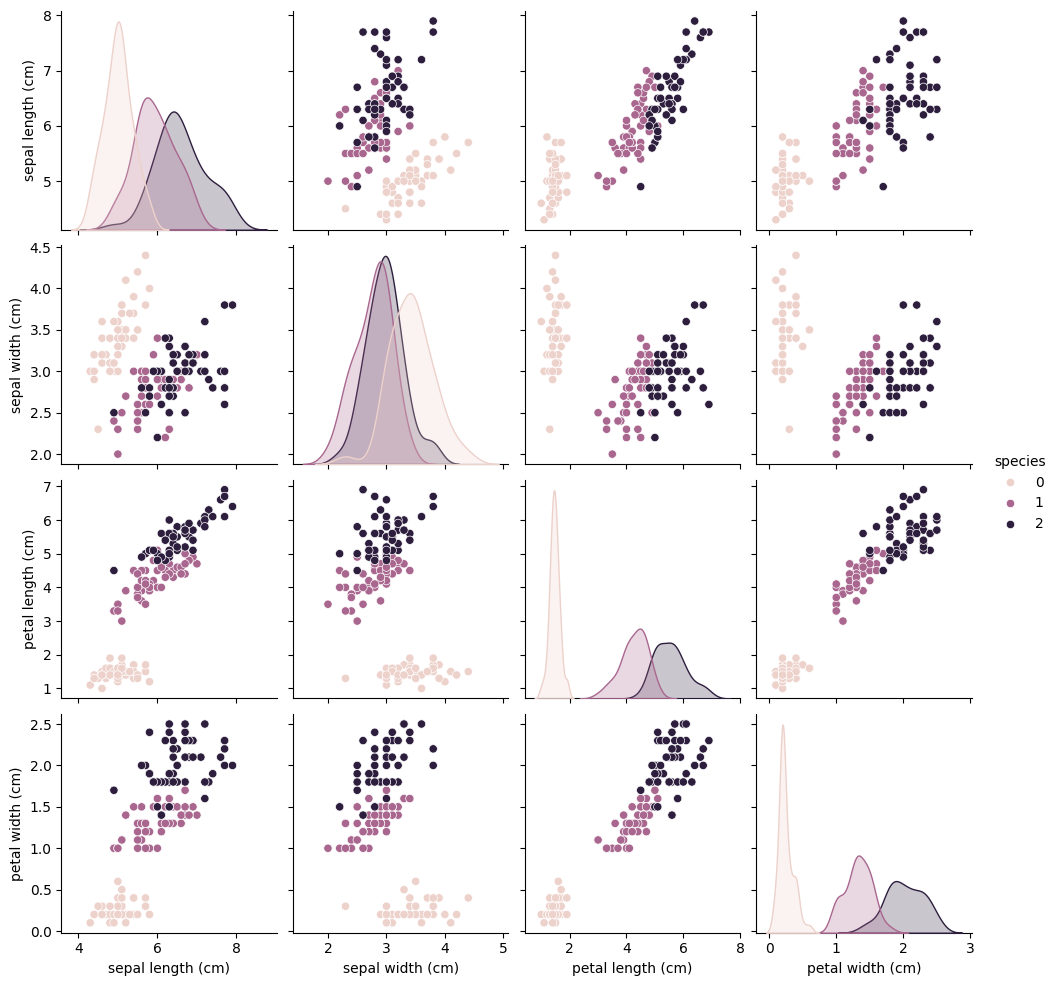

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

sns.pairplot(iris_df, hue='species')
plt.show()

### 2 - Séparez les données en 4 matrices : x_train, x_test, y_train, y_test. Les données d'entrée sont sur les 4 premières colonnes et les données de sortie sont sur la dernière colonne. Le rapport train/test doit être de 75/25.

In [ ]:
y = iris_df['species']
X = iris_df.drop(columns=['species'])
X_columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### 3 - En utilisant SKLearn, construire un classificateur logistique sur l'ensemble de données d'entraînement. Évaluer le modèle généré sur l'ensemble de données de test et affichez le score de prédiction. Que pensez-vous de ce score ?

In [ ]:
regr_log = LogisticRegression()

regr_log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(f'Train acc: {regr_log.score(X_train, y_train)}')
print(f'Test acc: {regr_log.score(X_test, y_test)}')

Train acc: 0.9732142857142857
Test acc: 1.0


L'accuracy de test est bonne (97% de réussite) et très proche de l'accuracy de train.

### 4 - Transformez les données pour les rendre utilisables par un réseau de neurones : la sortie doit être une matrice Nxn (n étant le nombre de classes du problème et N le nombre d'observations) au lieu d'un vecteur Nx1. Chaque colonne doit contenir un 1 si l'observation est de cette classe et zéro sinon. Regarder la fonction to_categorical.


In [ ]:
y_categorical = to_categorical(y, len(set(y)))
y_train_categorical = to_categorical(y_train, len(set(y)))
y_test_categorical = to_categorical(y_test, len(set(y)))


### 5 - Toujours en utilisant SKLearn, créer un perceptron pour classifier le jeu de données IRIS. Le réseau doit contenir une couche cachée de 16 neurones. Vous pouvez modifier les hyper-paramètres (solveur, fonction d'activation, taux d'apprentissage, etc.) du réseau comme vous le souhaitez

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(16), max_iter=5000)

In [ ]:
mlp.fit(X, y_categorical)

MLPClassifier(hidden_layer_sizes=16, max_iter=5000)

In [ ]:
print(f'Train : {mlp.score(X_train, y_train_categorical)}')
print(f'Test : {mlp.score(X_test, y_test_categorical)}')


Train : 0.9732142857142857
Test : 0.9736842105263158


## Exercice 2 – Perceptron Multicouche avec Keras

L’objectif de cet exercice est de prendre en main la bibliothèque Keras en recodant l’exercice
suivant avec ce nouvel outil. Pour cela, nous repartons des données organisées pour les
réseaux de neurones (sortie de to_categorical) du dataset IRIS.

In [ ]:
import tensorflow as tf

### 1 - À l'aide de Keras, créez un perceptron construit comme suit :
 - a. Une couche dense de 16 neurones connectée à une couche d'entrée de 4 neurones. La fonction d'activation de cette couche doit être une sigmoïde.
 - b. Une couche de sortie de 3 neurones avec une fonction d'activation softmax.

In [ ]:
model = tf.keras.Sequential()
# Couche d'entrée de 4 neuronnes
model.add(tf.keras.Input(shape=(4,)))
# Couche dense de 16 neuronnes avec une fonction d'activation sigmoïde
model.add(tf.keras.layers.Dense(16, activation="sigmoid"))
# Coude de sortie de 3 neuronnes avec une focntion d'activation softmax
model.add(tf.keras.layers.Dense(3, activation="softmax"))

### 2 - Utiliser la fonction de perte categorical_crossentropy (perte logarithmique), l'optimiseur Adam et activer le précalcul de la métrique de précision.

In [ ]:
adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

### 3 - Entraîner le réseau pendant 100 epochs.


In [ ]:
model.fit(X_train, y_train_categorical, epochs=500, verbose=1)


Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3213 - loss: 1.3717  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3390 - loss: 1.2947 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3202 - loss: 1.2719 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3484 - loss: 1.2155 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3463 - loss: 1.1848 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3182 - loss: 1.1787 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3744 - loss: 1.1052 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3223 - loss: 1.1281 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3421 - loss: 1.0917 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3171 - loss: 1.0893 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3348 - loss: 1.0624 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3119 - lo

### 4 - Comparer la précision de la classification obtenue avec la régression logistique de l'exercice 2.

In [ ]:
scores = model.evaluate(X_test, y_test_categorical, verbose=0)
print(scores[1])

0.9736841917037964


## Exercice 3 – Adapter un réseau à un problème donné


L’objectif est de construire un perceptron multicouche en modifiant son architecture pour
l'adapter à un problème donné.

### 1 - Charger le dataset MNist et visualiser les données chargées. Affichez les premières images du jeu de données. Que contient ce dataset et quel est son objectif ?

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

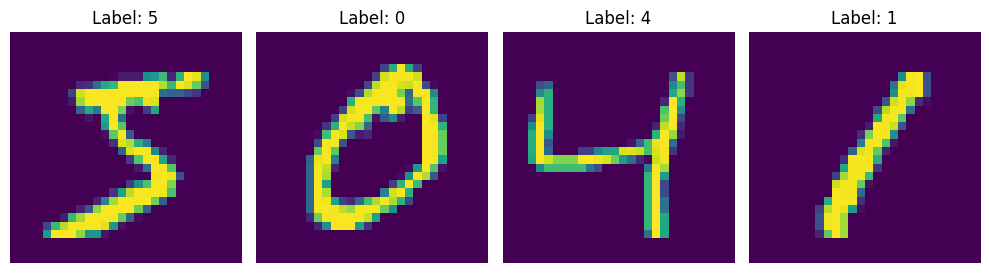

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### 2 - Modifier les données pour :
 - a. Linéariser les données en deux dimensions.
 - b. Normaliser les données
 - c. Transformer le vecteur de classes pour qu'il soit utilisable par un réseau de neurones.

In [ ]:
# A
print(X_train.shape)
print(X_test.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [ ]:
# B
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# C
y_train = to_categorical(y_train, len(set(y_train)))
y_test = to_categorical(y_test, len(set(y_test)))

### 3 - Entraîner l'architecture de l'exercice précédent à ce nouveau problème. Attention à la taille des couches d'entrée et de sortie !

In [ ]:
model = tf.keras.Sequential()
# Couche d'entrée de 784 neuronnes
model.add(tf.keras.Input(shape=(784,)))
# Couche dense de 16 neuronnes avec une fonction d'activation sigmoïde
model.add(tf.keras.layers.Dense(16, activation="sigmoid"))
# Coude de sortie de 10 neuronnes avec une focntion d'activation softmax
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=1)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.7872 - loss: 0.9998
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.7872 - loss: 0.9998
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.9162 - loss: 0.3210
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.9162 - loss: 0.3210
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.9274 - loss: 0.2576
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.9274 - loss: 0.2576
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - accuracy: 0.9378 - loss: 0.2243
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - accuracy: 0.9378 - loss: 0.2243
Epoch 5/100
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.9413 - loss: 0.2070
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.9413 - loss: 0.2070
Epoch 6/100
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step - accuracy: 0.9449 - loss: 0.1931

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss : {test_loss:.4f}")
print(f"Test accuracy : {test_accuracy:.4f}")

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Train loss : {train_loss:.4f}")
print(f"Train accuracy : {train_accuracy:.4f}")

Test loss : 0.3343
Test accuracy : 0.9264
Train loss : 0.0722
Train accuracy : 0.9814
Train loss : 0.0722
Train accuracy : 0.9814


### 4 - Entraîner le réseau de quelques epochs avec une taille de batch de 128. Observez le score du réseau. Que pensez-vous de ce résultat ?

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=1, batch_size=128)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9826 - loss: 0.0712
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9826 - loss: 0.0712
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9839 - loss: 0.0675
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9839 - loss: 0.0675
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9848 - loss: 0.0642
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9848 - loss: 0.0642
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9849 - loss: 0.0675
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9849 - loss: 0.0675
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9832 - loss: 0.0685
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9832 - loss: 0.0685
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9830 - loss: 0.0687
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss : {test_loss:.4f}")
print(f"Test accuracy : {test_accuracy:.4f}")

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Train loss : {train_loss:.4f}")
print(f"Train accuracy : {train_accuracy:.4f}")

Test loss : 0.3820
Test accuracy : 0.9234
Train loss : 0.0565
Train accuracy : 0.9873
Train loss : 0.0565
Train accuracy : 0.9873


Avec le batch l'entrainement est plus rapide (1min VS 3min) et légérement plus précis (0.9873 VS 0.9814)

## Exercice 4 – Créer des réseaux plus profonds


### 1 - Charger, afficher et formater le jeu de données Cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


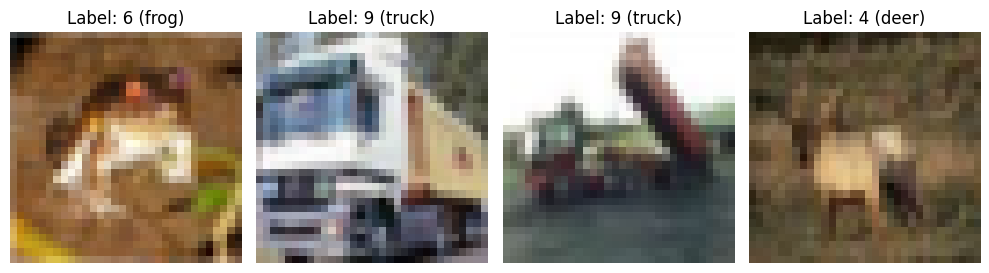

In [3]:
(X_train_original, y_train_original), (X_test_original, y_test_original) = tf.keras.datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train_original[i])
    plt.title(f"Label: {y_train_original[i][0]} ({class_names[y_train_original[i][0]]})")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])
print(X_train.shape)

(50000, 32, 32, 3)
(50000, 3072)


In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [6]:
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

y_train = to_categorical(y_train_flat, 10)
y_test = to_categorical(y_test_flat, 10)

### 2 - Adapter le perceptron de l'exercice précédent. Entraîner, évaluer et afficher les erreurs de classification. Essayez de modifier doucement le réseau (pas de nouvelle couche mais une couche cachée plus grande, des fonctions d'activation différentes, etc.) et évaluer ces différents réseaux. Que pensez-vous de la prédiction que vous obtenez ?


In [7]:
model = tf.keras.Sequential()
# Couche d'entrée de 3072 neuronnes
model.add(tf.keras.Input(shape=(3072,)))
# Couche dense de 16 neuronnes avec une fonction d'activation sigmoïde
model.add(tf.keras.layers.Dense(16, activation="sigmoid"))
# Coude de sortie de 10 neuronnes avec une focntion d'activation softmax
model.add(tf.keras.layers.Dense(10, activation="softmax"))

adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=100, verbose=1, batch_size=128)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2920 - loss: 2.0353
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3917 - loss: 1.7857
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4132 - loss: 1.7169
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4159 - loss: 1.6994
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4242 - loss: 1.6722
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4268 - loss: 1.6536
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4297 - loss: 1.6362
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4338 - loss: 1.6388
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4420 - loss: 1.6154
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4400 - loss: 1.6178
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4464 - loss: 1.5953
Epoch 12/100
391/391 ━━━━━━━━━━━━━━━━━━━━

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss : {test_loss:.4f}")
print(f"Test accuracy : {test_accuracy:.4f}")

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Train loss : {train_loss:.4f}")
print(f"Train accuracy : {train_accuracy:.4f}")

Test loss : 1.7789
Test accuracy : 0.3962
Train loss : 1.3690
Train accuracy : 0.5272


In [10]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [11]:
def plot_image(i, predictions_array, true_label, img):
  true_label_val = true_label[i][0]
  img = img[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label_val:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label_val]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label_val = np.argmax(true_label[i])

  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label_val].set_color('blue')

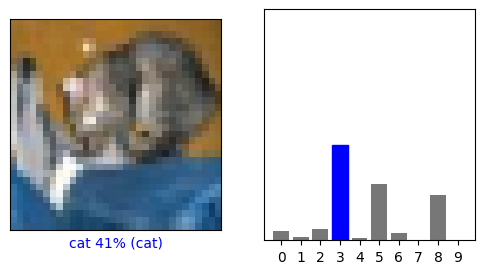

In [12]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_original, X_test_original)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

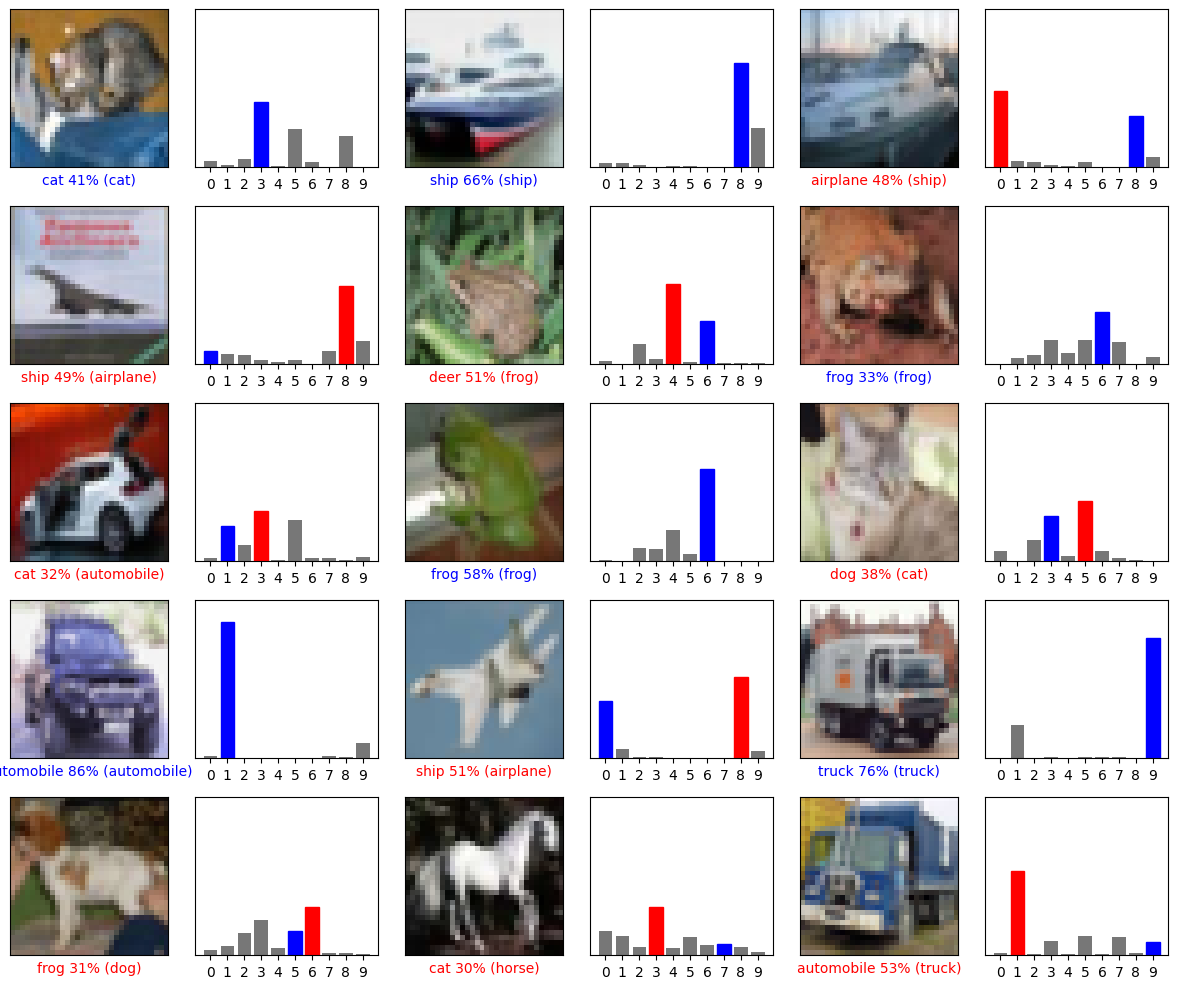

In [13]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test_original, X_test_original)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [14]:
model_2 = tf.keras.Sequential()
# Couche d'entrée de 3072 neuronnes
model_2.add(tf.keras.Input(shape=(3072,)))
# Couche dense de 2000 neuronnes avec une fonction d'activation sigmoïde
model_2.add(tf.keras.layers.Dense(2000, activation="sigmoid"))
# Couche de sortie de 10 neuronnes avec une focntion d'activation softmax
model_2.add(tf.keras.layers.Dense(10, activation="softmax"))

adam = tf.keras.optimizers.Adam()
model_2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [15]:
model_2.fit(X_train, y_train, epochs=100, verbose=1, batch_size=1500)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.2739 - loss: 2.5692
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4162 - loss: 1.7048
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4623 - loss: 1.5846
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4907 - loss: 1.5160
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5112 - loss: 1.4633
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5342 - loss: 1.4021
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5594 - loss: 1.3487
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5795 - loss: 1.2929
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5976 - loss: 1.2465
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6269 - loss: 1.1830
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6505 - loss: 1.1330
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

In [23]:
test_loss, test_accuracy = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Test loss : {test_loss:.4f}")
print(f"Test accuracy : {test_accuracy:.4f}")

train_loss, train_accuracy = model_2.evaluate(X_train, y_train, verbose=0)
print(f"Train loss : {train_loss:.4f}")
print(f"Train accuracy : {train_accuracy:.4f}")

Test loss : 1.9514
Test accuracy : 0.5022
Train loss : 0.0088
Train accuracy : 1.0000


In [17]:
predictions = model_2.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


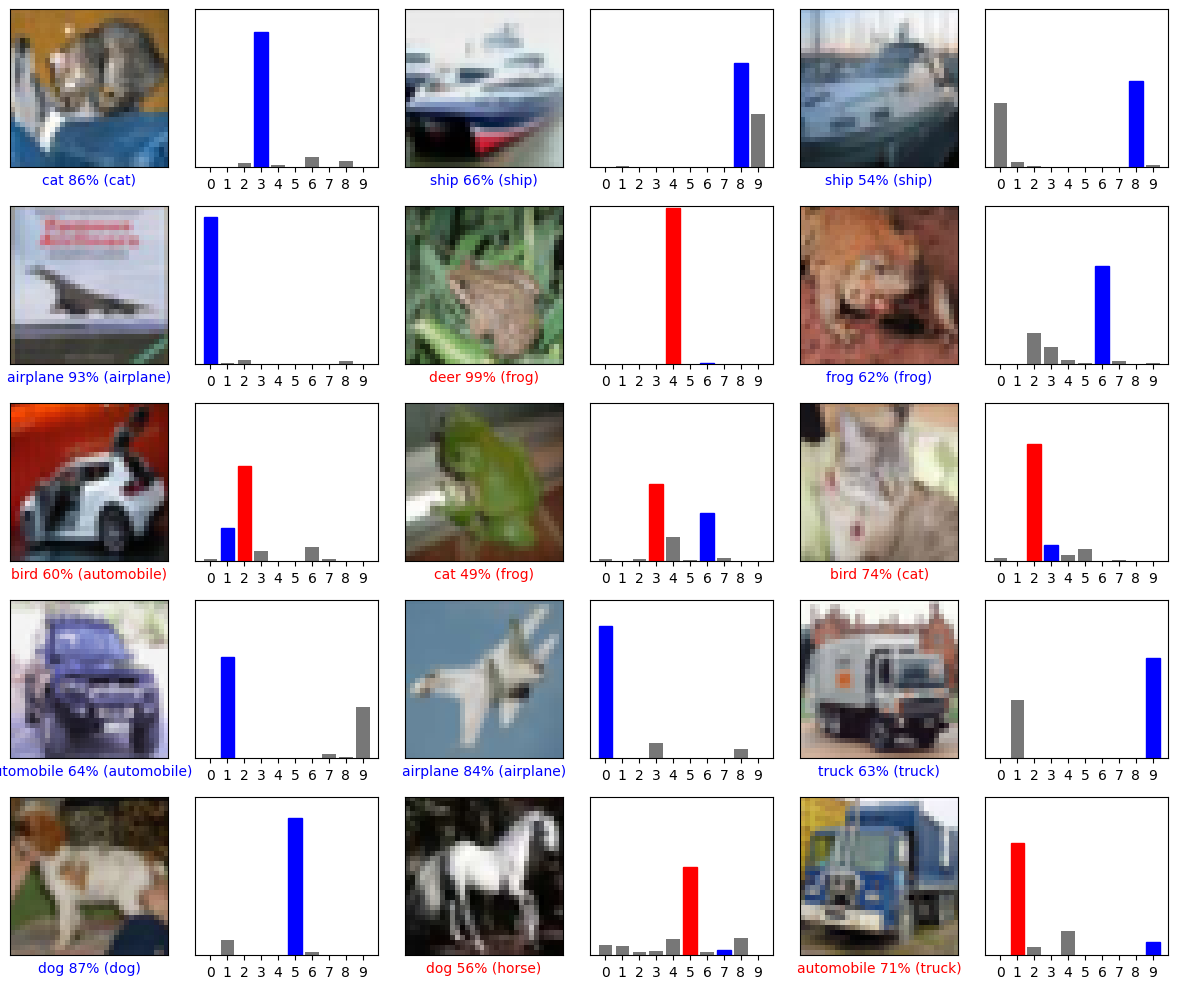

In [18]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test_original, X_test_original)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [25]:
model_3 = tf.keras.Sequential()
# Couche d'entrée de 3072 neuronnes
model_3.add(tf.keras.Input(shape=(3072,)))
# Couche dense de 2000 neuronnes avec une fonction d'activation sigmoïde
model_3.add(tf.keras.layers.Dense(2000, activation="sigmoid"))

model_3.add(tf.keras.layers.Dropout(0.2))
model_3.add(tf.keras.layers.BatchNormalization())

# Couche dense de 1000 neuronnes avec une fonction d'activation sigmoïde
model_3.add(tf.keras.layers.Dense(1000, activation="sigmoid"))

model_3.add(tf.keras.layers.Dropout(0.2))
model_3.add(tf.keras.layers.BatchNormalization())

# Couche dense de 500 neuronnes avec une fonction d'activation sigmoïde
model_3.add(tf.keras.layers.Dense(500, activation="sigmoid"))
# Couche de sortie de 10 neuronnes avec une focntion d'activation softmax
model_3.add(tf.keras.layers.Dense(10, activation="softmax"))

adam = tf.keras.optimizers.Adam()
model_3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [28]:
model_3.fit(X_train, y_train, epochs=100, verbose=1, batch_size=128)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3275 - loss: 1.9178
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4206 - loss: 1.6540
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4579 - loss: 1.5398
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4884 - loss: 1.4480
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5053 - loss: 1.3979
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5247 - loss: 1.3474
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5384 - loss: 1.3032
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5596 - loss: 1.2513
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5667 - loss: 1.2254
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5801 - loss: 1.1833
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5912 - loss: 1.1530
Epoch 12/100
391/391 ━━━━━━━━━━━━━━━━━━━

In [29]:
test_loss, test_accuracy = model_3.evaluate(X_test, y_test, verbose=0)
print(f"Test loss : {test_loss:.4f}")
print(f"Test accuracy : {test_accuracy:.4f}")

train_loss, train_accuracy = model_3.evaluate(X_train, y_train, verbose=0)
print(f"Train loss : {train_loss:.4f}")
print(f"Train accuracy : {train_accuracy:.4f}")

Test loss : 1.7205
Test accuracy : 0.5352
Train loss : 0.1782
Train accuracy : 0.9529


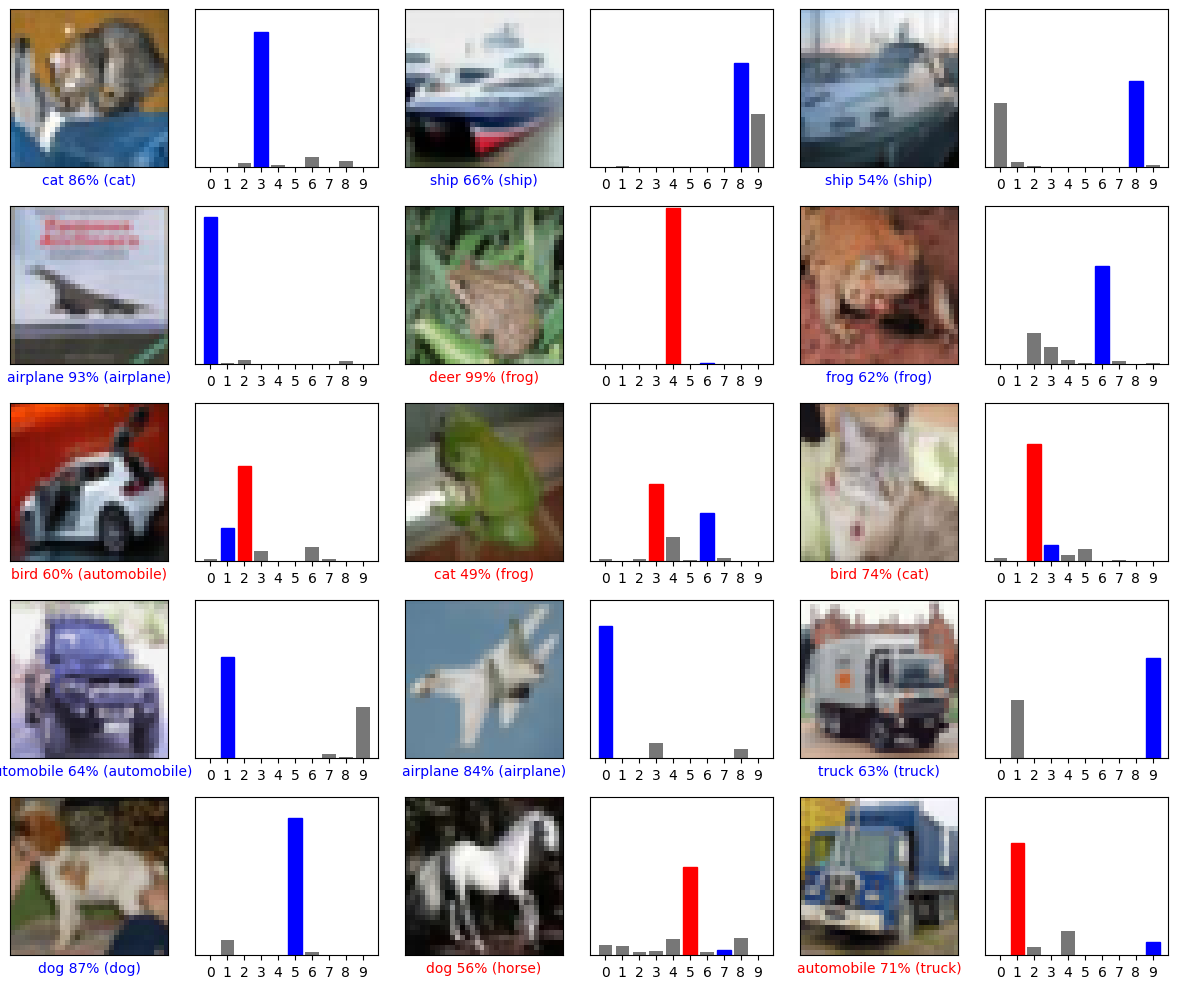

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test_original, X_test_original)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()